In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = 'C:/Users/694/MaskOrNOT'

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_mask_dir = os.path.join(train_dir, '0')
train_nomask_dir = os.path.join(train_dir, '1')
validation_mask_dir = os.path.join(validation_dir, '0')
validation_nomask_dir = os.path.join(validation_dir, '1')

In [6]:
validation_mask_dir

'C:/Users/694/MaskOrNOT\\validation\\0'

In [7]:
num_mask_tr = len(os.listdir(train_mask_dir))
num_nomask_tr = len(os.listdir(train_nomask_dir))

num_mask_val = len(os.listdir(validation_mask_dir))
num_nomask_val = len(os.listdir(validation_nomask_dir))

total_train = num_mask_tr + num_nomask_tr
total_val = num_mask_val + num_nomask_val

In [8]:
print(total_train, total_val)

100 50


In [9]:
#이렇게 프로그램하는것이 보기에도 좋고 깔끔
batch_size = 10
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
#keras에서 만든 아주 훌륭한 클래스 ImageDataGenerator
#디스크로 불러오며 , 사이즈변경, 스케일링까지 한번에 할 수 있는 고급 메서드가 들어있다.
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
#class_mode = 'binary' 이진분류, class_mode = 'categorical' 멀티분류
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 100 images belonging to 2 classes.


In [12]:
#class_mode = 'binary' 이진분류, class_mode = 'categorical' 멀티분류
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 50 images belonging to 2 classes.


In [13]:
sample_training_images, y_train = next(train_data_gen)

In [14]:
sample_training_images.shape

(10, 150, 150, 3)

In [15]:
y_train.shape

(10,)

In [16]:
y_train

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
#그림 5개씩 보여주는 함수입니다.
def plotImage(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

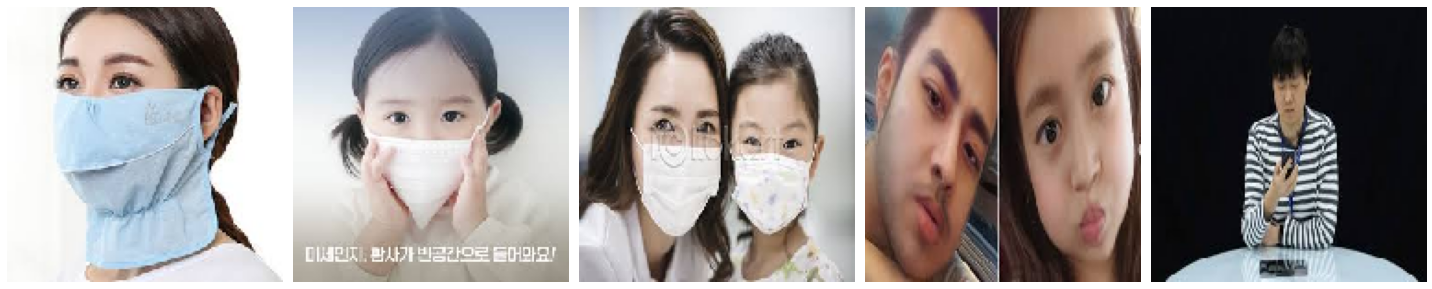

In [18]:
plotImage(sample_training_images[0:6])

In [19]:
y_train[0:6]

array([0., 0., 0., 1., 1., 0.], dtype=float32)

In [20]:
model = Sequential([
    Conv2D(16,3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPool2D(),
    Conv2D(32,3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64,3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [22]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [23]:
#학습시키는것이 살짝 다르다
#파이썬에서는 //연산자는 나누기 후 몫만 취한 후 나머지는 버림
#train과 validation을 동시실행

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= total_train//batch_size,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = total_val//batch_size
)

Epoch 1/10
10/10 [==============================] - 3s 260ms/step - loss: 1.1970 - accuracy: 0.5400 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 243ms/step - loss: 0.6879 - accuracy: 0.5000 - val_loss: 0.6759 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 263ms/step - loss: 0.6438 - accuracy: 0.5300 - val_loss: 0.6155 - val_accuracy: 0.5600
Epoch 4/10
10/10 [==============================] - 3s 258ms/step - loss: 0.6838 - accuracy: 0.6200 - val_loss: 0.6433 - val_accuracy: 0.5400
Epoch 5/10
10/10 [==============================] - 3s 253ms/step - loss: 0.5928 - accuracy: 0.6200 - val_loss: 0.6357 - val_accuracy: 0.5200
Epoch 6/10
10/10 [==============================] - 2s 241ms/step - loss: 0.4899 - accuracy: 0.6800 - val_loss: 0.5934 - val_accuracy: 0.5600
Epoch 7/10
10/10 [==============================] - 2s 242ms/step - loss: 0.3894 - accuracy: 0.8000 - val_loss: 0.7184 - val_accuracy: 0.7200
Epoch 

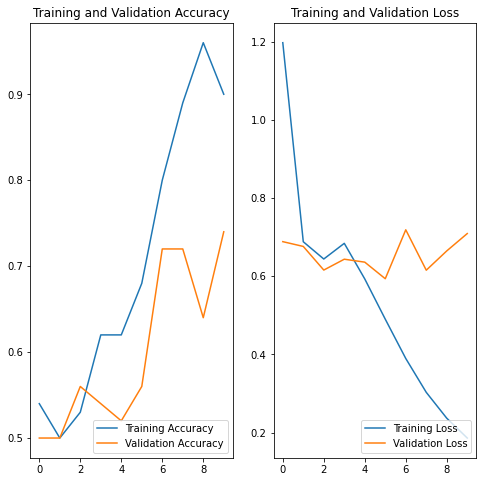

In [24]:
#학습결과값으로 즉 history 그래프를 그려봅시다
#그래프를 통해서 알 수 있는 것을 어느정도의 accuray 갖고 epochs 수는 얼마 좋은지 확인용

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
#모델 저장하기
model.save('detecting_mask_or_nomask.h5') #적어도 validation score가 0.85가 넘으면 저장

In [26]:
#batch_size=20, validation 데이터 가지고온다. 소수라서 모두 가져온다.
# 만약 데이터 큰경우 갖고 오고싶은 만큼 가져오면 된다. 예를 들어 2천장이면 2천, 100장이면 100장
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='binary')

Found 50 images belonging to 2 classes.


In [27]:
test_images, test_labels = next(val_data_gen)

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10/1 - 0s - loss: 0.9394 - accuracy: 0.6000


In [29]:
model.predict(test_images[[5]])

array([[-2.045585]], dtype=float32)

In [30]:
#이제부터 정확도 올려보고 Overfitting 해결해봅시다.
# 단 데이터 무조건 많아야 한다는 전제는 있다.
# 현재보다 overfitting 많이 개선된다.

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True) #세로축 기준으로 대칭

In [31]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                             directory=train_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 100 images belonging to 2 classes.


In [32]:
augmented_images = [ train_data_gen[0][0][0] for _ in range(5)]

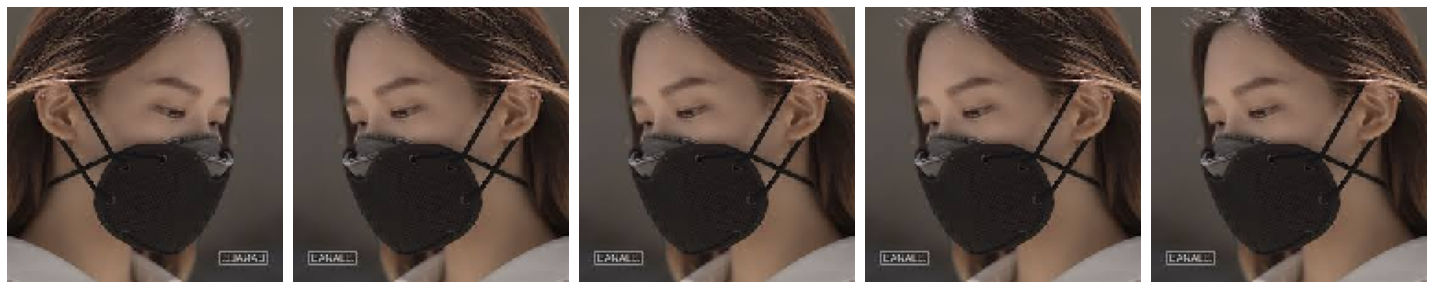

In [33]:
plotImage(augmented_images)

In [34]:
#정해진 각도 사이로 랜덤하게 돌리기
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                             directory=train_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [ train_data_gen[0][0][0] for _ in range(5)]

Found 100 images belonging to 2 classes.


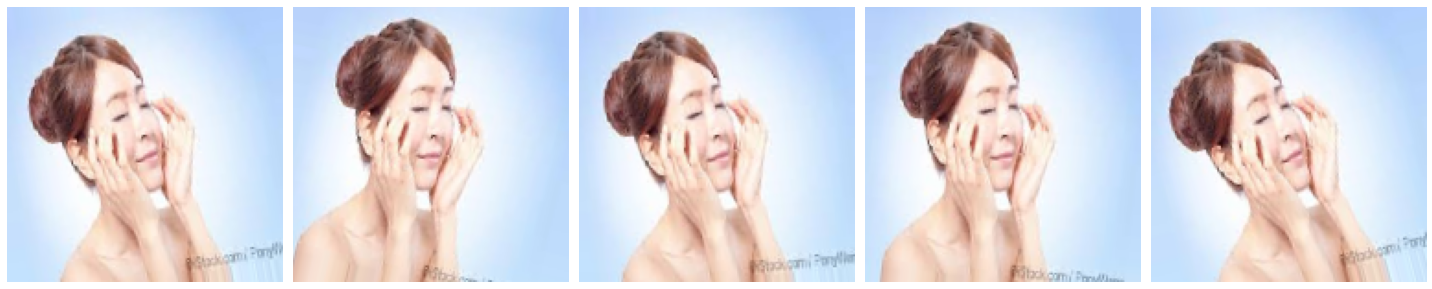

In [35]:
plotImage(augmented_images)

In [36]:
#수캐알랑 다시하기
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                             directory=train_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [ train_data_gen[0][0][0] for _ in range(5)]

Found 100 images belonging to 2 classes.


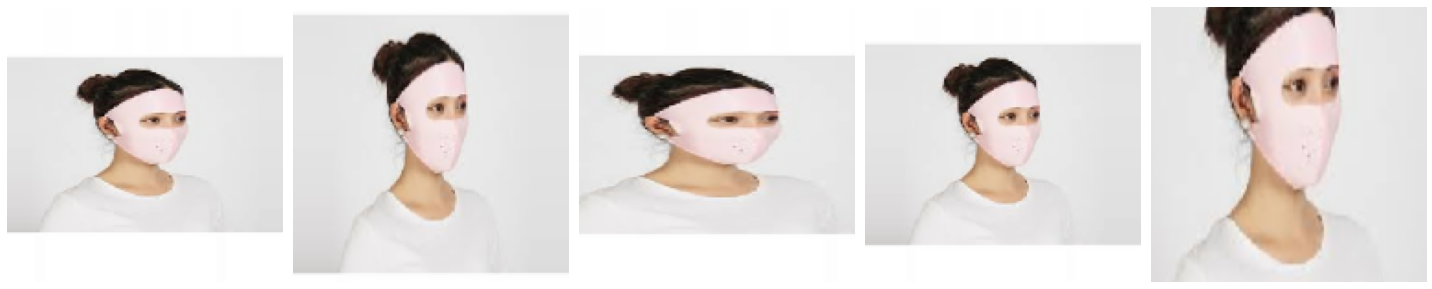

In [37]:
plotImage(augmented_images)

In [44]:
#짬뽕하기
image_gen = ImageDataGenerator(rescale=1./255, 
                               zoom_range=0.5,
                              rotation_range=45,
                              width_shift_range=15,
                              height_shift_range=15,
                              horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                             directory=train_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
augmented_images = [ train_data_gen[0][0][0] for _ in range(5)]

Found 100 images belonging to 2 classes.


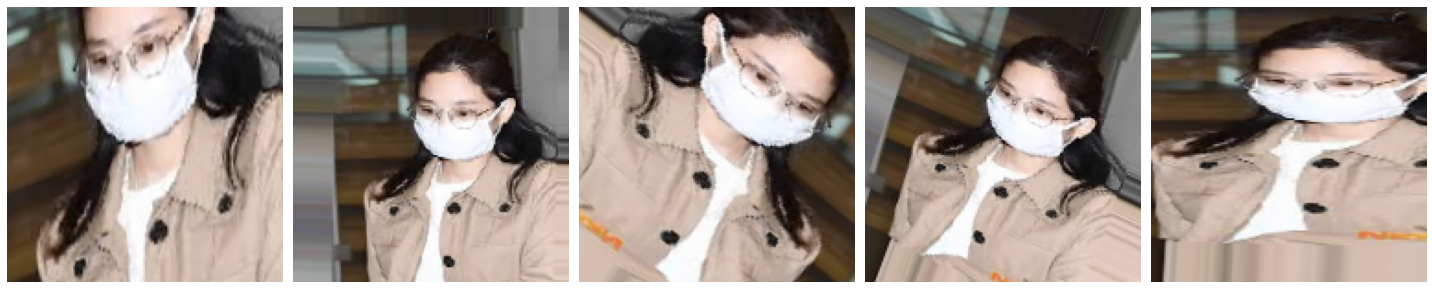

In [45]:
plotImage(augmented_images)

In [40]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [41]:
model_new = Sequential([
    Conv2D(16,3,padding='same',activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [42]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [46]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= (total_train//batch_size)*5,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = total_val//batch_size
)

Epoch 1/10
50/50 [==============================] - 11s 228ms/step - loss: 0.5067 - accuracy: 0.7520 - val_loss: 0.3861 - val_accuracy: 0.7800
Epoch 2/10
50/50 [==============================] - 11s 223ms/step - loss: 0.3939 - accuracy: 0.8220 - val_loss: 0.3650 - val_accuracy: 0.8800
Epoch 3/10
50/50 [==============================] - 11s 221ms/step - loss: 0.3757 - accuracy: 0.8340 - val_loss: 0.4219 - val_accuracy: 0.8200
Epoch 4/10
50/50 [==============================] - 11s 221ms/step - loss: 0.3516 - accuracy: 0.8300 - val_loss: 0.3902 - val_accuracy: 0.8400
Epoch 5/10
50/50 [==============================] - 11s 223ms/step - loss: 0.3284 - accuracy: 0.8580 - val_loss: 0.4009 - val_accuracy: 0.8400
Epoch 6/10
50/50 [==============================] - 12s 234ms/step - loss: 0.3349 - accuracy: 0.8440 - val_loss: 0.4748 - val_accuracy: 0.8200
Epoch 7/10
50/50 [==============================] - 11s 230ms/step - loss: 0.3238 - accuracy: 0.8440 - val_loss: 0.6631 - val_accuracy: 0.8400

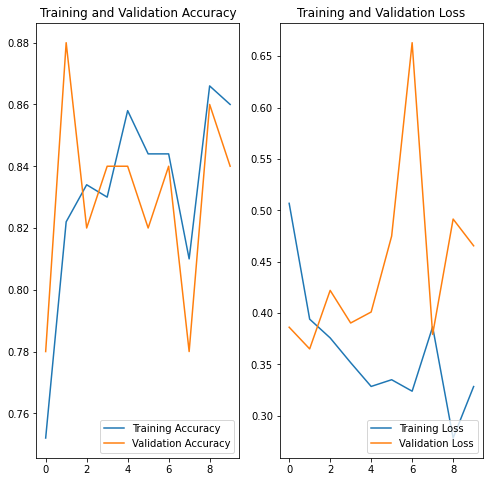

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()